In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
df= pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

## As There is no null values and also all the data types are converted in Numerical dtypes we can skip the data preprocessing part

In [8]:
# Looking if df is balanced or imbalanced.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

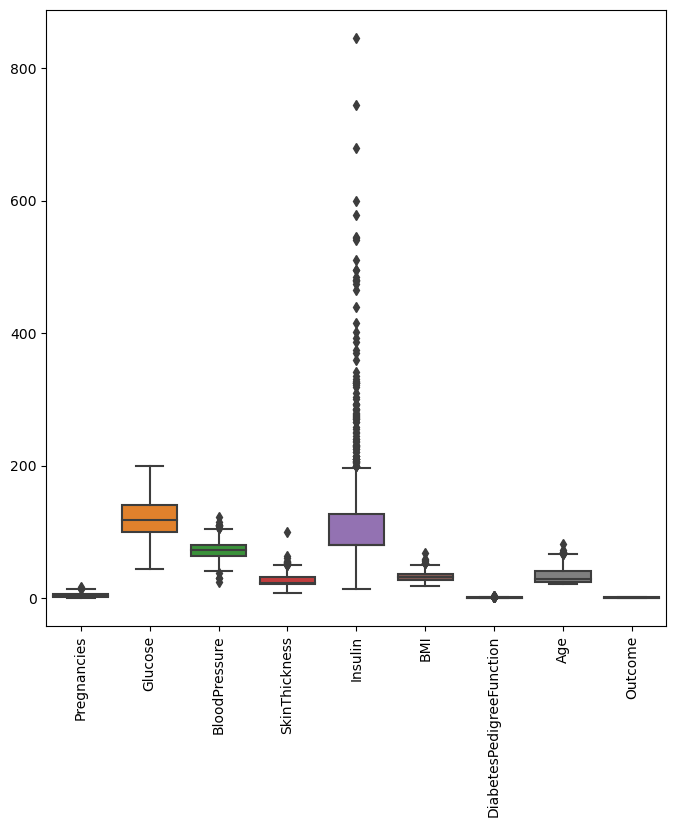

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [10]:
for col in df.columns:
    minimum,Q1,Q2,Q3,maximum = np.quantile(df[col],[0,0.25,0.50,0.75,1.0])
    IQR = Q3-Q1
    Lower_limit = Q1 -(1.5*IQR)
    Upper_limit = Q3 +(1.5*IQR)
    print(col,Lower_limit,Upper_limit)
    ## Handling the Outliers
    df=  df[(df[col] > Lower_limit) & (df[col]<Upper_limit)]

Pregnancies -6.5 13.5
Glucose 37.5 201.5
BloodPressure 40.0 104.0
SkinThickness 3.341145833333332 49.1953125
Insulin 8.248697916666671 199.05078125
BMI 14.400000000000002 48.0
DiabetesPedigreeFunction -0.30499999999999994 1.1429999999999998
Age 0.0 64.0
Outcome -1.5 2.5


In [11]:
df.shape

(600, 9)

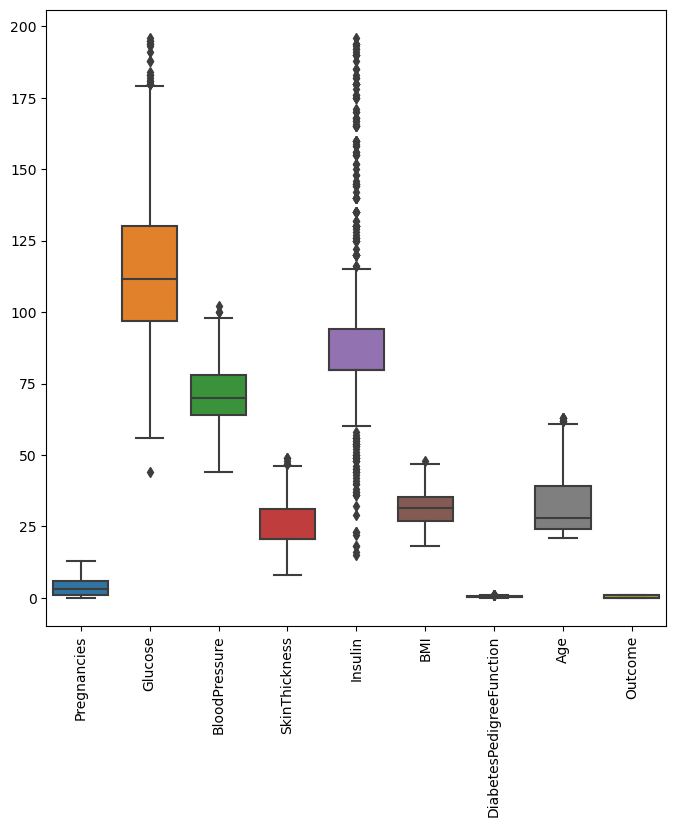

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# These are the values for every Feature to handle Outliers and now Outliers are also treated to some extent

## Here we can clearly see that df is imbalanced and we have a binary classification Problem.

In [13]:
## To solve the imabalanced df problem we use smote which internally uses df interpolation technique to create new df points
from imblearn.over_sampling import SMOTE

In [14]:
oversample = SMOTE()
X,y = oversample.fit_resample(df.iloc[:,:-1],df['Outcome'])

In [15]:
X.shape

(840, 8)

In [16]:
y.shape

(840,)

In [17]:
df.shape

(600, 9)

In [18]:
y.value_counts()

1    420
0    420
Name: Outcome, dtype: int64

## Now we have converted the df into Balanced dfset

In [19]:
## Scaling down our X features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
X = pd.DataFrame(X,columns=df.columns[:-1])

In [22]:
y= pd.DataFrame(y,columns=['Outcome'])

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.617257,0.898527,0.022825,1.256171,-0.390394,0.274446,0.913484,1.671691
1,-0.937920,-1.296131,-0.577670,0.479760,-0.390394,-0.936952,-0.309692,-0.215435
2,1.239328,2.117782,-0.777835,-0.615438,-0.390394,-1.508040,1.112915,-0.116113
3,-0.937920,-1.156788,-0.577670,-0.296651,0.030436,-0.677367,-1.125144,-1.208659
4,0.306222,-0.216220,0.222991,-0.615438,-0.390394,-1.110009,-0.974462,-0.314758


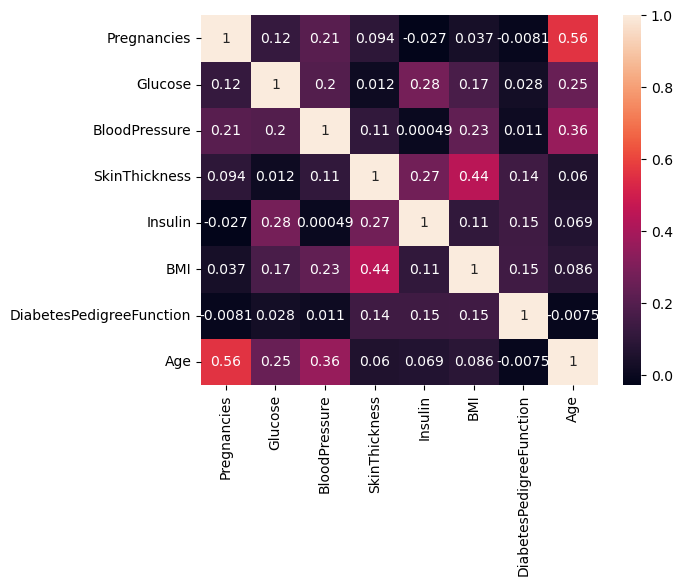

In [24]:
sns.heatmap(X.corr(),annot=True)
plt.show()

In [25]:
## Checking for Multicollinearity
def corelation(df,threshold):
    col_corr=set()
    corr_mat = df.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr
    del col_corr

In [26]:
col_corr = corelation(X,threshold=0.70)

In [27]:
col_corr

set()

## We Don't Have multicollinearity in this dfset

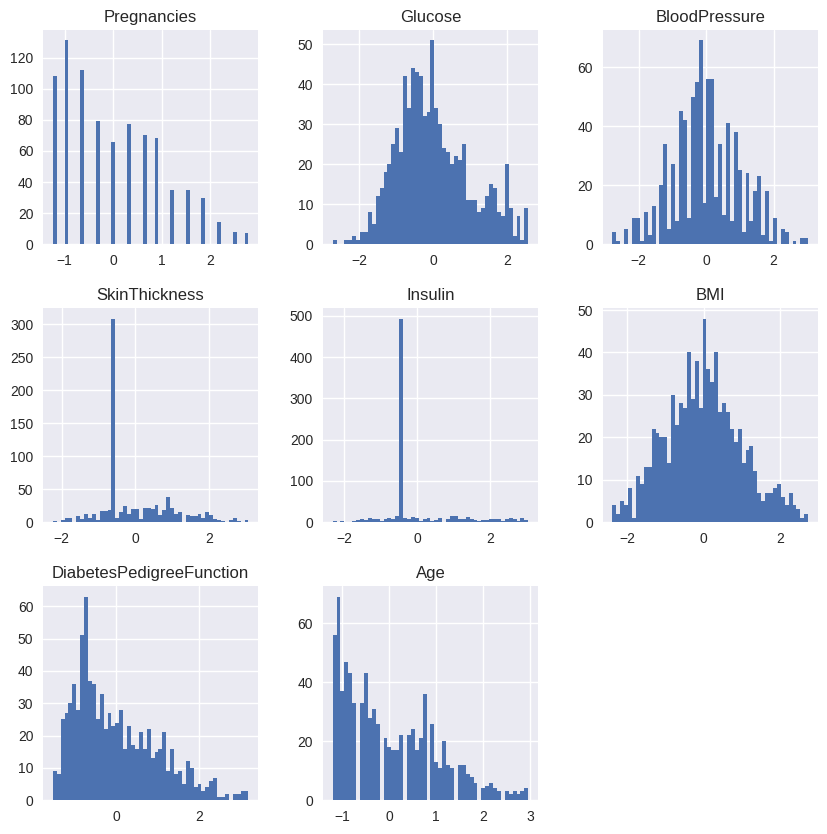

In [28]:
## Checking df distribution
plt.style.use('seaborn')
X.hist(bins=50,figsize=(10,10))
plt.show()

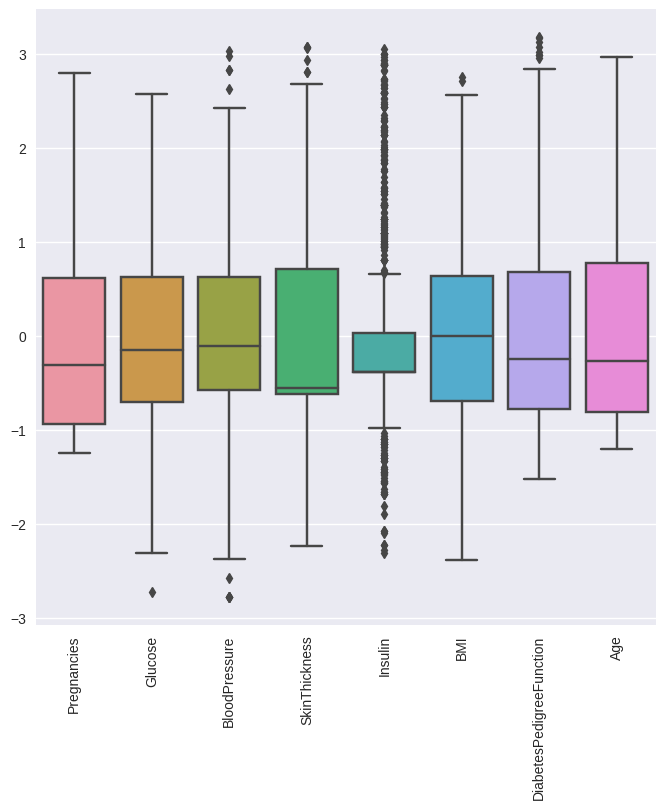

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

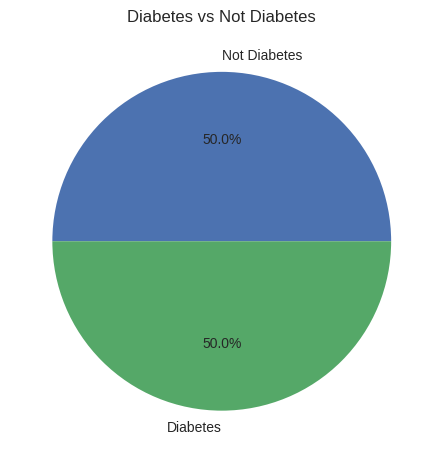

In [30]:
Outcome_normalized= y.value_counts(normalize=True)
plt.pie(Outcome_normalized,labels=['Not Diabetes','Diabetes'],autopct='%1.1f%%')
plt.title('Diabetes vs Not Diabetes')
plt.show()

In [31]:
## Splitting the df in train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Hyper parameter Tuning 

In [70]:
parameters = {
    'penalty':('l1', 'l2', 'elasticnet', None),
    'C':[1,10],
    'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')
}
clf = GridSearchCV(LogisticRegression(),param_grid=parameters,cv=10)

In [71]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [72]:
clf.best_params_

{'C': 1, 'penalty': None, 'solver': 'lbfgs'}

In [73]:
clf.best_score_

0.7545112781954887

In [75]:
logistic_regression = LogisticRegression(C=1,penalty='none',solver='lbfgs')

In [76]:
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1, penalty='none')

In [77]:
y_pred =logistic_regression.predict(X_test)

In [78]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[107  31]
 [ 37 103]]
0.7553956834532374
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       138
           1       0.77      0.74      0.75       140

    accuracy                           0.76       278
   macro avg       0.76      0.76      0.76       278
weighted avg       0.76      0.76      0.76       278



In [79]:
X_train.shape,X_test.shape

((562, 8), (278, 8))

In [80]:
import pickle
pickle.dump(scaler,open('/config/workspace/Models/standardScalar.pkl','wb'))
pickle.dump(logistic_regression,open('/config/workspace/Models/modelForPrediction.pkl','wb'))